In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

n = 10000  # numero de personas
T = 312  # numero de periodos 6 años 
s = np.random.rand(n)  # vector PoS de las personas en el intante t, al principio aleatorio
g=np.zeros(n)#vector identificacion de grupo
psi = 0.9  # velocidad perdida de memoria
nu = 0.9  # Impacto de la inseguridad
mu = 0.1  # Resistencia a la inseguridad
St = np.zeros((T,n ))  # PoS a lo largo del tiempo
m = 3  # cantidad de grupos con distinta tasa de crimen por periodo
lamda = np.array([0,0.05,1.7])  # tasas de crimen de los grupos
lamda[0]=0 #grupo inmune
q = np.array([0.65, 0.3, 0.05])  # porcentajes de los grupos en la poblacion total

#identificacion de cada sujeto con su respectiva media de crimen 
for i in range(int(n*q[0])):
    g[i]=lamda[0]
for i in range(int(n*q[0]),int(n*(q[0]+q[1]))):
    g[i]=lamda[1]
for i in range(int(n*(q[0]+q[1])),n):
    g[i]=lamda[2]

        
perceptionHomo=np.zeros((11,3))#percepcion segun la homofilia de los 3 grupos
homofilia=np.zeros(T)
for h in range(11):
# calculo de la Pos en el intante t
# en t=0 es s
    print("-------------")
    
    St[0] = s
    parescom=np.zeros(T)#cantidad pares de comunicacion en cada periodo
    commismogrupo=np.zeros(T)#cantidad de comunicaciones en el mismo grupo
    for t in range(1,T):
        # Al inicio de cada periodo aplicamos la perdida de memoria
        s = psi * s
        
         #pares de comunicacion 
        #vector de personas aleatoriamente ordenado 
        apersonas=np.random.permutation(np.arange(n))
        #escogemos  10% del extremo izq
        pares1=apersonas[:int(n*0.1)]
        pares2=np.zeros(len(pares1))
        for k in range(len(pares1)):
            varhomo=np.random.binomial(1,h/10.0)    
            if varhomo==1:#si es 1 se comunica en su mismo grupo
            # seleccionamos con quien se da la comunicacion
                j = np.random.randint(n)
                contador=0
                while j in pares1 or j in pares2 or g[pares1[k]]!=g[j]:
                    j = np.random.randint(n)
                    contador=contador+1
                    if contador>5:
                        break               
            elif varhomo==0:#si es 0 se comunica con otro grupo
            # seleccionamos con quien se da la comunicacion
                j = np.random.randint(n)
                contador=0
                while j in pares1 or j in pares2 or g[pares1[k]]==g[j]:
                    j = np.random.randint(n)
                    contador=contador+1
                    if contador>5:
                        break
            #despues de definir j lo ponemos en el vector pares2
            pares2[k]=j       
        for k in range(len(pares1)):
            aux1=int(pares1[k])
            aux2=int(pares2[k])
            if s[aux1]<s[aux2]:
                s[aux1] = s[aux1] - nu * (s[aux1] - s[aux2])
                s[aux2] = s[aux2] - mu * (s[aux2] - s[aux1])
            else:
                s[aux1] = s[aux1] - mu * (s[aux1] - s[aux2])
                s[aux2] = s[aux2] - nu * (s[aux2] - s[aux1])
            #medicion de la homofilia
            if g[aux1]==g[aux2]:
                commismogrupo[t]=commismogrupo[t]+1
    
    
        parescom[t]=len(pares1)
        homofilia[t]=commismogrupo[t]/parescom[t]
        #crimen                   
        for k in range(n):
            # numero de crimenes sufridos por la persona k 
            X = np.random.poisson(g[k])
            # posicion hubo crimen o no
            I = 0
            if X >= 1:  # si hubo al menos un crimen I=1 de lo contrario I=0
                I = 1
            # efecto del crimen en la percepcion de k para el siguiente periodo
            s[k] = I + (1 - I) * s[k]    
        St[t] = s
    print(np.mean(homofilia))
    perceptionHomo[h][0]=np.mean(np.mean(St[104:,range(int(n*q[0]))],axis=1))
    perceptionHomo[h][1]=np.mean(np.mean(St[104:,range(int(n*q[0]),int(n*q[0]+n*q[1]))],axis=1))
    perceptionHomo[h][2]=np.mean(np.mean(St[104:,range(int(n*q[0]+n*q[1]),n)],axis=1))
    print(".")
print(perceptionHomo)
print("cantidad de pares de comunicacion")
plt.plot(parescom[1:])
plt.show()
print("Porcentaje grupos con distinta media de crimen")
print(q)
print("Vector media de crimen por grupos")
print(lamda)
print("velocidad de olvido")
print(psi)
print("impacto de la inseguridad nu")
print(nu)
print("Resistencia a la inseguridad mu")
print(mu)


-------------
0.05715705128205128
.
-------------
0.1433525641025641
.
-------------
0.22917307692307695
.
-------------
0.3150192307692308
.
-------------
0.4010160256410256
.
-------------
0.4886955128205129
.
-------------
0.5756249999999999
.
-------------
0.6606282051282051
.
-------------
0.7475384615384616
.
-------------
0.8355032051282052
.
-------------
0.9235769230769231
.
[[0.30374294 0.44414654 0.97687112]
 [0.2954942  0.44443986 0.97702822]
 [0.28688842 0.44330589 0.97691696]
 [0.27692033 0.44422999 0.97671766]
 [0.2670236  0.44430668 0.97695335]
 [0.25305166 0.44524129 0.97704249]
 [0.23796183 0.44801959 0.97739949]
 [0.21943496 0.44937185 0.97687117]
 [0.19631069 0.45619102 0.97729385]
 [0.16499589 0.46159918 0.97709743]
 [0.11597896 0.4647626  0.97712932]]
cantidad de pares de comunicacion


Porcentaje grupos con distinta media de crimen
[0.65 0.3  0.05]
Vector media de crimen por grupos
[0.   0.05 1.7 ]
velocidad de olvido
0.9
impacto de la inseguridad nu
0.9
Resistencia a la inseguridad mu
0.1


[Text(0,0,u'0'),
 Text(0,0,u'0.1'),
 Text(0,0,u'0.2'),
 Text(0,0,u'0.3'),
 Text(0,0,u'0.4'),
 Text(0,0,u'0.5'),
 Text(0,0,u'0.6'),
 Text(0,0,u'0.7'),
 Text(0,0,u'0.8'),
 Text(0,0,u'0.9'),
 Text(0,0,u'1')]

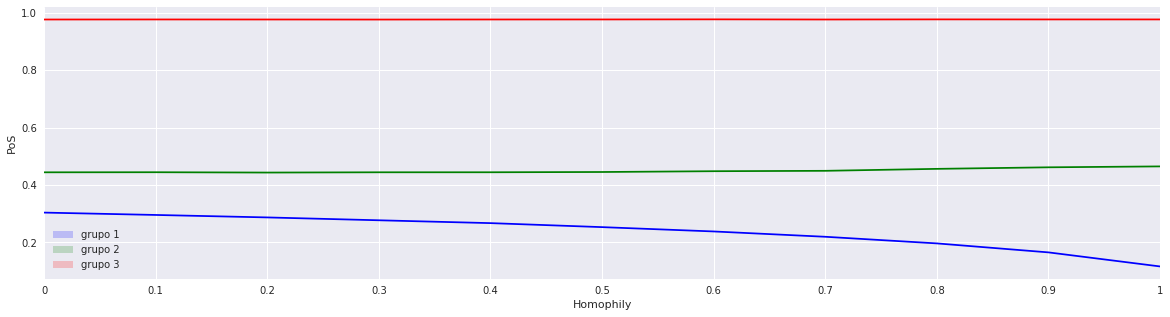

In [12]:
import seaborn as sns
sns.set(color_codes=True)
plt.figure(figsize=(20,5))
sns.tsplot(perceptionHomo[:,0].T,color="blue")
sns.tsplot(perceptionHomo[:,1].T,color="green")
sns.tsplot(perceptionHomo[:,2].T,color="red")
plt.legend(["grupo 1","grupo 2", "grupo 3"])
plt.xlabel("Homophily")
plt.ylabel("PoS")
ax = plt.axes()
ax.xaxis.set_ticks([0, 1, 2, 3, 4,5,6,7,8,9,10])
ax.xaxis.set_ticklabels(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1'])

In [5]:
perceptionHomo

array([[0.30374294, 0.44414654, 0.97687112],
       [0.2954942 , 0.44443986, 0.97702822],
       [0.28688842, 0.44330589, 0.97691696],
       [0.27692033, 0.44422999, 0.97671766],
       [0.2670236 , 0.44430668, 0.97695335],
       [0.25305166, 0.44524129, 0.97704249],
       [0.23796183, 0.44801959, 0.97739949],
       [0.21943496, 0.44937185, 0.97687117],
       [0.19631069, 0.45619102, 0.97729385],
       [0.16499589, 0.46159918, 0.97709743],
       [0.11597896, 0.4647626 , 0.97712932]])